# Calculating Halo Mass Function
### Read in Data

In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import random
from astroML.correlation import two_point

cdm = h5py.File('Data/COLOR_CDM_DM_subHaloes_z0.00.hdf5', 'r')
wdm = h5py.File('Data/COLOR_WDM_DM_subHaloes_z0.00.hdf5', 'r')

print(cdm,wdm)

<HDF5 file "COLOR_CDM_DM_subHaloes_z0.00.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_subHaloes_z0.00.hdf5" (mode r)>


In [2]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm[list(cdm.keys())[1]][:]
cdm_position = cdm[list(cdm.keys())[2]][:]

wdm_mass = wdm[list(wdm.keys())[1]][:]
wdm_position = wdm[list(cdm.keys())[2]][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['IsCentral', 'SubhaloMass', 'SubhaloPos'] ['IsCentral', 'SubhaloMass', 'SubhaloPos']


(array([1.87617493e+14, 1.84468594e+14, 6.89978024e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [17.94562721, 79.86347198, 53.3843956 ],
        [15.62266159, 78.18474579, 52.83857346],
        ...,
        [ 1.47748172,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.06210327,  4.18381023,  2.89533377]]),
 array([1.89941540e+14, 1.86912732e+14, 6.83256568e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328194e+01],
        [1.09048624e+01, 8.12610779e+01, 5.48179665e+01],
        [1.56323376e+01, 7.81665344e+01, 5.28157997e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758224e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897159e-03, 3.23730016e+00, 9.97708917e-01]]))

### Let's focus on subhalos for this dataset

In [3]:
cdm_mass_subhalo_ind = np.where(cdm[list(cdm.keys())[0]][:] == 0)
wdm_mass_subhalo_ind = np.where(wdm[list(wdm.keys())[0]][:] == 0)

cdm_mass_subhalo = cdm_mass[cdm_mass_subhalo_ind]
wdm_mass_subhalo = wdm_mass[wdm_mass_subhalo_ind]

print(cdm_mass[cdm_mass_subhalo_ind], cdm_mass_subhalo_ind)
print(wdm_mass[cdm_mass_subhalo_ind], cdm_mass_subhalo_ind)

[1.84468594e+14 6.89978024e+13 1.93107916e+13 ... 1.84811792e+08
 1.76011232e+08 1.76011232e+08] (array([      1,       2,       3, ..., 2653013, 2697889, 2700770],
      dtype=int64),)
[1.86912732e+14 6.83256568e+13 1.93096130e+13 ... 2.20014032e+08
 2.02412912e+08 2.02412912e+08] (array([      1,       2,       3, ..., 2653013, 2697889, 2700770],
      dtype=int64),)


### Create the Halo Mass Functions!

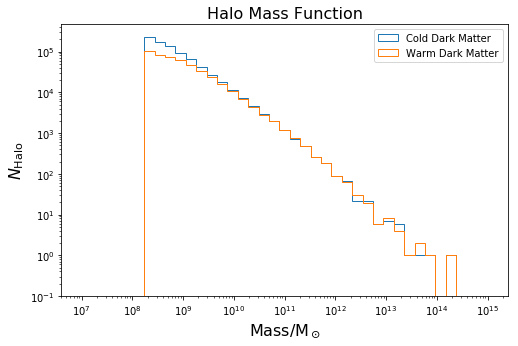

In [4]:
# Create a histogram
bins = np.logspace(7, 15, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm, bins_cdm, patches_cdm = plt.hist(cdm_mass_subhalo, bins = bins, log = True, histtype = 'step', label = "Cold Dark Matter")
N_wdm, bins_wdm, patches_wdm = plt.hist(wdm_mass_subhalo, bins = bins, log = True, histtype = 'step', label = "Warm Dark Matter")
plt.title("Halo Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Halo}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()
plt.savefig("Images/Data2/HMF_Hist_Subhalo.png")
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


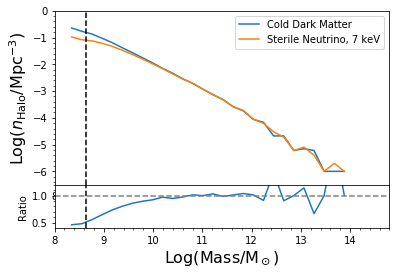

In [5]:
# line plot of histogram
# USE for report!!

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), label = "Cold Dark Matter")
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), label = "Sterile Neutrino, 7 keV")
grid0.axvline(x = m_res, color = "black", ls = "--")
grid0.set_ylabel(r"Log($n_{\rm {Halo}}$/Mpc$^{-3}$)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-6.5, 0)
grid0.set_xlim(8, 14.8)

grid1.plot(np.log10(0.5*(bins[1:]+bins[:-1])), n_wdm/n_cdm)
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axvline(x = m_res, color = "black", ls = "--")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(0.4, 1.2)
grid1.set_xlim(8, 14.8)

plt.savefig("Images/Data2/HMF_Subhalo.png")
plt.show()

# Let's try the Correlation Function on a random sample!
### First, make a random sample of size 10000

In [6]:
random.seed(6231998)

len_cdm_pos = len(cdm_position)
len_wdm_pos = len(wdm_position)

cdm_ind = random.sample(range(len_cdm_pos), 10000)
cdm_ind.sort()
cdm_sample = cdm_position[cdm_ind]

wdm_ind = random.sample(range(len_wdm_pos), 10000)
wdm_ind.sort()
wdm_sample = wdm_position[wdm_ind]

cdm_sample, wdm_sample

(array([[13.65805817, 78.74584198, 53.88441086],
        [15.6060524 , 77.86431885, 51.56642151],
        [10.94302464, 80.45332336, 55.44592285],
        ...,
        [29.29703712, 14.71036339, 99.12403107],
        [18.0628643 , 22.98508835, 93.88729095],
        [ 4.1047163 , 24.19762421, 96.89350128]]),
 array([[16.54050064, 79.10873413, 54.7684288 ],
        [10.08025074, 80.90972137, 54.00135803],
        [11.769701  , 82.44211578, 54.13241196],
        ...,
        [14.59177303, 15.51073647, 82.59197235],
        [18.33222198, 93.68041992, 68.49799347],
        [ 5.02093744, 10.75529385, 95.20912933]]))

### Let's see the range of distances:

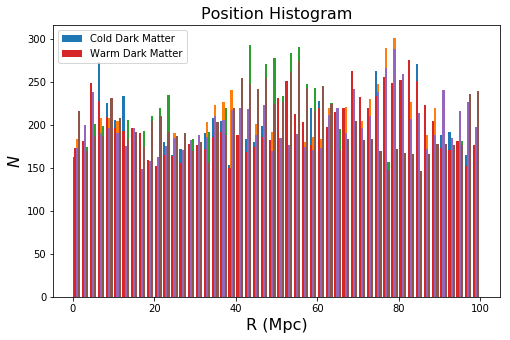

In [7]:
fig = plt.figure(figsize = (8,5))
plt.hist(cdm_sample, bins = 50, label = "Cold Dark Matter")
plt.hist(wdm_sample, bins = 50, label = "Warm Dark Matter")
plt.title("Position Histogram", fontsize = 16)
plt.ylabel(r"$N$", fontsize = 16)
plt.xlabel("R (Mpc)", fontsize = 16)
plt.legend()
plt.show()

# Now we can calculate the correlation function
### Pick bins that are 1/10th of the entire range

In [8]:
bins = np.logspace(-2,1,50)

cdm_corrfunc = two_point(cdm_sample, bins, "landy-szalay")
wdm_corrfunc = two_point(wdm_sample, bins, "landy-szalay")

cdm_corrfunc, wdm_corrfunc

(array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,  2.        ,
                nan,         nan,         nan,         nan,         nan,
         5.        ,         nan,         nan,         nan, 10.        ,
        11.        , 13.        , 23.        , 19.        , 16.66666667,
        15.2       , 22.66666667, 12.88888889,  9.8125    ,  8.86363636,
         7.05263158,  5.34920635,  5.6746988 ,  4.46099291,  3.87980769,
         3.43197279,  2.5620915 ,  2.07797538,  1.8       ,  1.37536486,
         1.05673759,  0.82423777,  0.64153846,  0.52842657,  0.41587471,
         0.34731619,  0.27271811,  0.23217391,  0.18079265]),
 array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,   

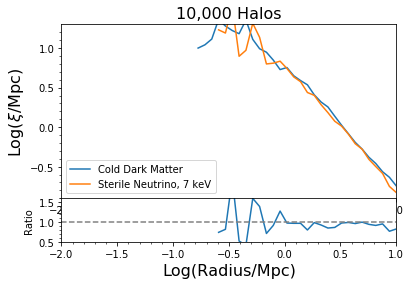

In [9]:
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-0.9, 1.3)
grid0.set_xlim(-2, 1)
grid0.set_title("10,000 Halos", fontsize = 16)

grid1.plot(np.log10(bins[1:]), wdm_corrfunc/cdm_corrfunc)
grid1.set_xlabel("Log(Radius/Mpc)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(0.5, 1.6)
grid1.set_xlim(-2, 1)

plt.savefig("Images/Data2/Corrfunc.png")
plt.show()

### Now let's try a larger sample of size 300,000!

In [10]:
cdm_ind2 = random.sample(range(len_cdm_pos), 300000)
cdm_ind2.sort()
cdm_sample2 = cdm_position[cdm_ind2]

wdm_ind2 = random.sample(range(len_wdm_pos), 300000)
wdm_ind2.sort()
wdm_sample2 = wdm_position[wdm_ind2]

print(len(cdm_sample2), len(wdm_sample2))
cdm_sample2, wdm_sample2

np.savetxt("cdm_pos.txt", cdm_sample2, fmt = "%f %f %f")
np.savetxt("wdm_pos.txt", wdm_sample2, fmt = "%f %f %f")

300000 300000


(array([[12.3693409 , 80.60988617, 54.50309372],
        [10.53033161, 82.91926575, 54.66617966],
        [11.86091995, 79.15536499, 54.31300735],
        ...,
        [ 9.13665009,  6.23374748, 94.28605652],
        [ 1.42471027,  0.70556533, 83.50953674],
        [ 5.24496174,  5.05443668, 96.62012482]]),
 array([[ 9.63675499, 81.8635025 , 56.07550812],
        [15.81794643, 77.8640213 , 52.59863663],
        [14.88079453, 77.87620544, 52.12598801],
        ...,
        [99.87644196,  4.73674679, 90.3600235 ],
        [ 2.28072619,  3.23965693,  1.57123482],
        [ 5.38029957,  5.11628771, 98.45252228]]))

# From Odyssey

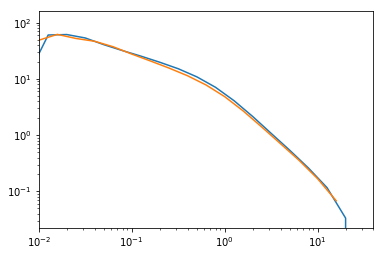

In [11]:
data = np.genfromtxt("Output/corr_cdm.dat", usecols = (0,1))
data2 = np.genfromtxt("Output/corr_wdm.txt", usecols = (0,1))

r = data[:,0]
xi = data[:,1]

r2 = data2[:,0]
xi2 = data2[:,1]

plt.loglog(r, xi)
plt.loglog(r2, xi2)
plt.xlim(1e-2, 4e1)
plt.show()

In [ ]:
bins3 = np.logspace(-2,np.log10(40),50)

cdm_corrfunc_sample2 = two_point(cdm_sample2, bins3, "landy-szalay")
wdm_corrfunc_sample2 = two_point(wdm_sample2, bins3, "landy-szalay")

cdm_corrfunc_sample2, wdm_corrfunc_sample2

In [ ]:
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc_sample2), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc_sample2), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-0.9, 2.1)
grid0.set_xlim(-2, 1)
grid0.set_xticklabels([])
grid0.set_title("300,000 Halos", fontsize = 16)

grid1.plot(np.log10(bins[1:]), wdm_corrfunc_sample2/cdm_corrfunc_sample2)
grid1.set_xlabel("Log(Radius/Mpc)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(0.85, 1.15)
grid1.set_xlim(-2, 1)

plt.savefig("Images/Data2/Corrfunc_Large.png")
plt.show()

# Next, compute the correlation function for all galaxies
### First, we need to split them by mass

In [12]:
# CDM Mass
cdm_mass1_ind = np.where(np.array(cdm_mass) < 10**10)
cdm_mass3_ind = np.where(np.array(cdm_mass) > 10**12)

len_cdm_mass = len(cdm_mass)
cdm_mass2_ind = np.setdiff1d(range(len(cdm_mass)), np.append(cdm_mass1_ind, cdm_mass3_ind))

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where(np.array(wdm_mass) < 10**10)
wdm_mass3_ind = np.where(np.array(wdm_mass) > 10**12)

len_wdm_mass = len(wdm_mass)
wdm_mass2_ind = np.setdiff1d(range(len(wdm_mass)), np.append(wdm_mass1_ind, wdm_mass3_ind))

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

[9.99743795e+09 9.98863770e+09 9.97983642e+09 ... 1.76011232e+08
 1.76011232e+08 1.76011232e+08] [9.94067350e+11 9.24727771e+11 8.65447248e+11 ... 1.00062382e+10
 1.00062382e+10 1.00062382e+10] [1.87617493e+14 1.84468594e+14 6.89978024e+13 ... 1.00362479e+12
 1.00983800e+12 1.00531457e+12]
[9.99743795e+09 9.97103616e+09 9.95343565e+09 ... 1.76011232e+08
 1.76011232e+08 1.76011232e+08] [9.52731238e+11 7.29760203e+11 7.04705004e+11 ... 1.00062382e+10
 1.00062382e+10 1.00062382e+10] [1.89941540e+14 1.86912732e+14 6.83256568e+13 ... 1.00423205e+12
 1.01647365e+12 1.00837714e+12]
4646299 121993 1749
2962935 117568 1772


### Reduce the larger datasets to a more manageable size

In [13]:
cdm_mass1_ind = random.sample(range(len(cdm_mass1)), 300000)
cdm_mass1_ind.sort()
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind]

wdm_mass1_ind = random.sample(range(len(wdm_mass1)), 300000)
wdm_mass1_ind.sort()
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind]

cdm_mass1_sample, wdm_mass1_sample

(array([9.50460621e+09, 9.43420211e+09, 9.25819085e+09, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([9.75102259e+09, 9.53100800e+09, 9.33739622e+09, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]))

### And get their corresponding positions

In [14]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

### Now we can compute their respective correlation functions

In [ ]:
bins2 = np.logspace(0,1,20)

# CDM Correlation Function
cdm_corrfunc1 = two_point(cdm_pos1, bins, "landy-szalay")
cdm_corrfunc2 = two_point(cdm_pos2, bins, "landy-szalay")
cdm_corrfunc3 = two_point(cdm_pos3, bins2, "landy-szalay")

# WDM Correlation Function
wdm_corrfunc1 = two_point(wdm_pos1, bins, "landy-szalay")
wdm_corrfunc2 = two_point(wdm_pos2, bins, "landy-szalay")
wdm_corrfunc3 = two_point(wdm_pos3, bins2, "landy-szalay")

print(cdm_corrfunc1, cdm_corrfunc2, cdm_corrfunc3)
print(wdm_corrfunc1, wdm_corrfunc2, wdm_corrfunc3)

### And graph them!

In [ ]:
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc1), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc1), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.set_title(r"< 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc2))
grid1.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc2))
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc3))
grid2.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc3))
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.plot(np.log10(bins[1:]), wdm_corrfunc1/cdm_corrfunc1)
grid3.set_ylabel("Ratio")

grid4.plot(np.log10(bins[1:]), wdm_corrfunc2/cdm_corrfunc2)
grid4.set_xlabel("Log(Radius/Mpc)", fontsize = 16)

grid5.plot(np.log10(bins[1:]), wdm_corrfunc3/cdm_corrfunc3)

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(-2.1, 1.1)
    plt.subplot(grid[i]).set_ylim(-0.9, 2.1)

    
for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.5, 1.5)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
# plt.savefig("Images/Data2/Corrfunc_Mass.png")
plt.show()

use CUTE for corrfunc (1,000,000) (20 Mpc) FIRST DATA
do corrfunc by mass and make sure to match abundances
request 32 threads

moving from odyssey to laptop: scp mshiferaw@odyssey.rc.fas.harvard.edu:/n/home00/mshiferaw/CUTE/CUTE_box/corr_cdm.dat

moving from laptop to odyssey: scp wdm_pos.txt mshiferaw@odyssey.rc.fas.harvard.edu:/n/home00/mshiferaw/CUTE/CUTE_box

set OMP_NUM_THREADS=number of threads to use

# Now let's do it in Odyssey
### Get a sample size of 1,000,000

In [18]:
cdm_ind3 = random.sample(range(len_cdm_pos), 1000000)
cdm_sample3 = cdm_position[cdm_ind3]

wdm_ind3 = random.sample(range(len_wdm_pos), 1000000)
wdm_sample3 = wdm_position[wdm_ind3]

print(len(cdm_sample3), len(wdm_sample3))
cdm_sample3, wdm_sample3

1000000 1000000


(array([[15.93745613, 24.78445053, 64.50945282],
        [ 0.44150433, 25.12399101, 32.78940964],
        [56.96700287, 46.6361351 , 81.07238007],
        ...,
        [89.03981781, 14.97429562, 65.34658813],
        [ 7.11283827, 92.6963501 , 48.1089325 ],
        [58.61915207, 52.72025299, 73.46424866]]),
 array([[96.73640442, 12.04708767, 94.06132507],
        [28.27940941, 51.70175171,  0.98193872],
        [46.09702682, 72.25561523, 98.52039337],
        ...,
        [32.7161026 , 23.74845123, 45.96992493],
        [17.06161308, 29.81500626, 51.79278946],
        [26.08969688, 10.22833538, 18.62170219]]))

In [ ]:
np.savetxt("cdm_pos.txt", cdm_sample3, fmt = "%f %f %f")
np.savetxt("wdm_pos.txt", wdm_sample3, fmt = "%f %f %f")

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


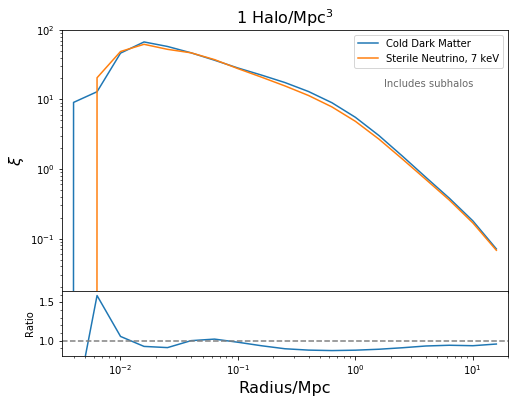

In [21]:
CUTE_cdm = np.genfromtxt("Output/corr_cdm.txt", usecols = (0,1))
CUTE_wdm = np.genfromtxt("Output/corr_wdm.txt", usecols = (0,1))

plt.figure(figsize=(8,6))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm[:,0], CUTE_cdm[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm[:,0], CUTE_wdm[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-2.5, 2e1)
grid0.set_ylim(10**-1.75, 10**2)
grid0.set_ylabel(r"$\xi$", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("1 Halo/Mpc$^{3}$", fontsize = 16)
grid0.text(1.75,15, "Includes subhalos", fontsize=10, color = "dimgrey")

grid1.semilogx(CUTE_wdm[:,0], CUTE_wdm[:,1]/CUTE_cdm[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-2.5, 2e1)
grid1.set_ylim(0.8, 1.65)
grid1.minorticks_on()

plt.savefig("Images/Data2/Corrfunc_Largest.pdf")
plt.show()

In [22]:
print(CUTE_cdm[:,0]/CUTE_wdm[:,0])
print(CUTE_cdm[:,1], CUTE_wdm[:,1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 1.262220e+03 0.000000e+00 7.870379e+01
 0.000000e+00 9.057938e+00 1.289542e+01 4.627867e+01 6.698733e+01
 5.768063e+01 4.677018e+01 3.661364e+01 2.827851e+01 2.238414e+01
 1.747191e+01 1.300130e+01 8.962121e+00 5.529836e+00 3.028156e+00
 1.531754e+00 7.594480e-01 3.798887e-01 1.797460e-01 7.103946e-02] [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.   

sort by descending mass and pick first 1,000,000

write down number density (10 halos/Mpc^3)

### Let's do it by descending mass: 1,000,000 halos

In [23]:
cdm_mass_ind = sorted(range(len(cdm_mass)), key=lambda k: cdm_mass[k], reverse = True)
wdm_mass_ind = sorted(range(len(wdm_mass)), key=lambda k: wdm_mass[k], reverse = True)

cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:1000000]], wdm_mass[wdm_mass_ind[:1000000]]

(array([3.73203399e+14, 2.64301886e+14, 2.37995899e+14, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([3.83537157e+14, 2.65522210e+14, 2.42340996e+14, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([3.73203399e+14, 2.64301886e+14, 2.37995899e+14, ...,
        1.00326406e+09, 1.00326406e+09, 1.00326406e+09]),
 array([3.83537157e+14, 2.65522210e+14, 2.42340996e+14, ...,
        7.12845504e+08, 7.12845504e+08, 7.12845504e+08]))

In [24]:
np.savetxt("cdm_pos_sorted.txt", cdm_position[cdm_mass_ind[:1000000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted.txt", wdm_position[wdm_mass_ind[:1000000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:1000000]], wdm_position[wdm_mass_ind[:1000000]]

(array([[ 5.65795231, 75.58934784, 47.56488037],
        [52.49923706,  4.96875668, 20.11238289],
        [ 9.07952595, 35.07922745, 54.54546738],
        ...,
        [ 5.22195101, 76.85787201, 46.54729843],
        [ 1.78846097, 49.23150253, 52.44090652],
        [54.34751511, 12.63790035, 43.44240952]]),
 array([[ 5.73223734, 75.64173126, 47.56919861],
        [52.50284576,  4.96340752, 20.1236496 ],
        [ 9.07071495, 35.11302567, 54.56375885],
        ...,
        [79.07712555, 69.95150757,  7.75758696],
        [76.1607132 , 63.38542938,  2.9683156 ],
        [84.99749756, 64.77207947,  5.19630671]]))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


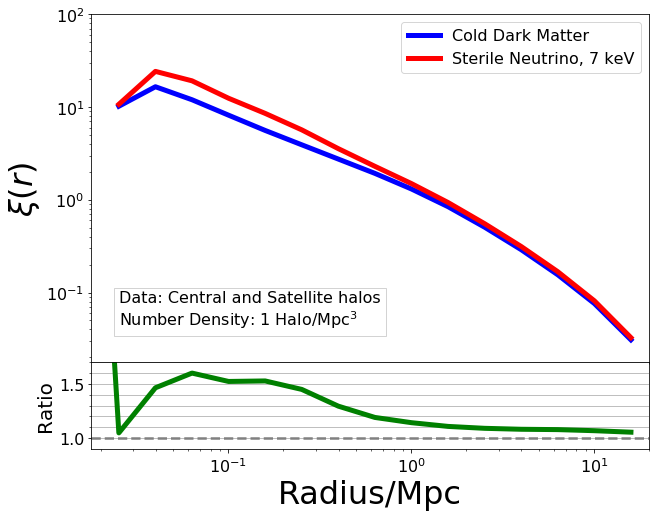

In [10]:
CUTE_cdm_sorted = np.genfromtxt("Output/corr_cdm_pos_sorted.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("Output/corr_wdm_pos_sorted.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite halos',
    r'Number Density: 1 Halo/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.set_xlim(10**-1.75, 2e1)
grid0.set_ylim(10**-1.75, 10**2)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
# grid0.set_title("1 Halo/Mpc$^{3}$", fontsize = 16)
# grid0.text(10**-2.25,10**-1.25, "Includes satellite and central halos", fontsize=10, color = "dimgrey")
# grid0.text(10**-2.25,10**-1.5, "Target number density: 1 Halo/Mpc$^{3}$", fontsize=10, color = "dimgrey")
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1],  linewidth = 5, color = "green")
grid1.set_xlabel("Radius/Mpc", fontsize = 32)
grid1.set_ylabel("Ratio",  fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.set_xlim(10**-1.75, 2e1)
grid1.set_ylim(0.9, 1.7)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data2/Corrfunc_Largest_Sorted.pdf")
plt.savefig("Images/Data2/Corrfunc_Largest_Sorted.png")
plt.show()

### Now 100,000 halos

In [27]:
np.savetxt("cdm_pos_sorted2.txt", cdm_position[cdm_mass_ind[:100000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted2.txt", wdm_position[wdm_mass_ind[:100000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:100000]], wdm_position[wdm_mass_ind[:100000]]

(array([[ 5.65795231, 75.58934784, 47.56488037],
        [52.49923706,  4.96875668, 20.11238289],
        [ 9.07952595, 35.07922745, 54.54546738],
        ...,
        [77.65075684, 87.46994781, 24.95531273],
        [45.25731277, 31.99403381, 77.32970428],
        [64.42139435, 82.44651031, 89.37177277]]),
 array([[ 5.73223734, 75.64173126, 47.56919861],
        [52.50284576,  4.96340752, 20.1236496 ],
        [ 9.07071495, 35.11302567, 54.56375885],
        ...,
        [45.31025314, 59.71863556, 75.60819244],
        [58.28261185,  8.49526691, 15.94517231],
        [87.14931488, 81.94500732, 34.40135956]]))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


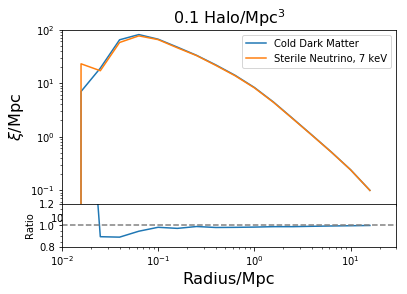

In [29]:
CUTE_cdm_sorted = np.genfromtxt("Output/corr_cdm_pos_sorted2.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("Output/corr_wdm_pos_sorted2.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-2, 3e1)
grid0.set_ylim(10**-1.25, 10**2)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("0.1 Halo/Mpc$^{3}$", fontsize = 16)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-2, 3e1)
grid1.set_ylim(0.8, 1.2)
grid1.minorticks_on()

plt.savefig("Images/Data2/Corrfunc_Largest_Sorted2.pdf")
plt.show()

### Lastly, 1000 halos

In [30]:
np.savetxt("cdm_pos_sorted3.txt", cdm_position[cdm_mass_ind[:1000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted3.txt", wdm_position[wdm_mass_ind[:1000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:1000]], wdm_position[wdm_mass_ind[:1000]]

(array([[ 5.65795231, 75.58934784, 47.56488037],
        [52.49923706,  4.96875668, 20.11238289],
        [ 9.07952595, 35.07922745, 54.54546738],
        ...,
        [52.93241119, 58.34991074, 54.37636566],
        [15.02247143, 79.71017456, 43.51224899],
        [ 4.32279634, 73.71121216, 47.5958252 ]]),
 array([[ 5.73223734, 75.64173126, 47.56919861],
        [52.50284576,  4.96340752, 20.1236496 ],
        [ 9.07071495, 35.11302567, 54.56375885],
        ...,
        [14.11869431, 75.35248566, 25.39867592],
        [23.460495  , 30.44774437, 82.52955627],
        [96.39450073, 35.61066055, 13.79202938]]))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


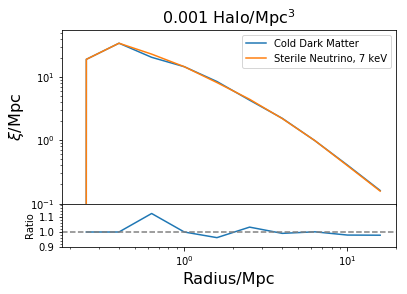

In [31]:
CUTE_cdm_sorted = np.genfromtxt("Output/corr_cdm_pos_sorted3.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("Output/corr_wdm_pos_sorted3.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-0.75, 2e1)
grid0.set_ylim(10**-1, 10**1.75)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("0.001 Halo/Mpc$^{3}$", fontsize = 16)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-0.75, 2e1)
grid1.set_ylim(0.9, 1.19)
grid1.minorticks_on()

plt.savefig("Images/Data2/Corrfunc_Largest_Sorted3.png")
plt.show()

# Now, compute split mass in Odyssey at fixed abundance!

In [32]:
# CDM Mass
cdm_mass1_ind = np.where((cdm_mass > 10**8.6) &(cdm_mass < 10**10))
cdm_mass2_ind = np.where((cdm_mass > 10**10) & (cdm_mass < 10**12))
cdm_mass3_ind = np.where(cdm_mass > 10**12)

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where((wdm_mass > 10**8.6) &(wdm_mass < 10**10))
wdm_mass2_ind = np.where((wdm_mass > 10**10) & (wdm_mass < 10**12))
wdm_mass3_ind = np.where(wdm_mass > 10**12)

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

[9.99743795e+09 9.98863770e+09 9.97983642e+09 ... 4.04825824e+08
 4.04825824e+08 4.04825824e+08] [9.94067350e+11 9.24727771e+11 8.65447248e+11 ... 1.00062382e+10
 1.00062382e+10 1.00062382e+10] [1.87617493e+14 1.84468594e+14 6.89978024e+13 ... 1.00362479e+12
 1.00983800e+12 1.00531457e+12]
[9.99743795e+09 9.97103616e+09 9.95343565e+09 ... 4.04825824e+08
 4.04825824e+08 4.04825824e+08] [9.52731238e+11 7.29760203e+11 7.04705004e+11 ... 1.00062382e+10
 1.00062382e+10 1.00062382e+10] [1.89941540e+14 1.86912732e+14 6.83256568e+13 ... 1.00423205e+12
 1.01647365e+12 1.00837714e+12]
2135802 121993 1749
1378458 117568 1772


In [33]:
# low mass group
cdm_mass1_ind = sorted(range(len(cdm_mass1)), key=lambda k: cdm_mass1[k], reverse = True)
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind[:1370000]]

wdm_mass1_ind = sorted(range(len(wdm_mass1)), key=lambda k: wdm_mass1[k], reverse = True)
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind[:1370000]]

# mid mass group
cdm_mass2_ind = sorted(range(len(cdm_mass2)), key=lambda k: cdm_mass2[k], reverse = True)
cdm_mass2_sample = cdm_mass2[cdm_mass2_ind[:117000]]

wdm_mass2_ind = sorted(range(len(wdm_mass2)), key=lambda k: wdm_mass2[k], reverse = True)
wdm_mass2_sample = wdm_mass2[wdm_mass2_ind[:117000]]

# high mass group
cdm_mass3_ind = sorted(range(len(cdm_mass3)), key=lambda k: cdm_mass3[k], reverse = True)
cdm_mass3_sample = cdm_mass3[cdm_mass3_ind[:1749]]

wdm_mass3_ind = sorted(range(len(wdm_mass3)), key=lambda k: wdm_mass3[k], reverse = True)
wdm_mass3_sample = wdm_mass3[wdm_mass3_ind[:1749]]

cdm_mass1_sample, wdm_mass1_sample, cdm_mass2_sample, wdm_mass2_sample, cdm_mass3_sample, wdm_mass3_sample

(array([9.99743795e+09, 9.99743795e+09, 9.99743795e+09, ...,
        6.42441024e+08, 6.42441024e+08, 6.42441024e+08]),
 array([9.99743795e+09, 9.99743795e+09, 9.99743795e+09, ...,
        4.04825824e+08, 4.04825824e+08, 4.04825824e+08]),
 array([9.99990231e+11, 9.99462142e+11, 9.99418167e+11, ...,
        1.04638679e+10, 1.04638679e+10, 1.04638679e+10]),
 array([9.99823049e+11, 9.99550157e+11, 9.99506117e+11, ...,
        1.00502415e+10, 1.00502415e+10, 1.00502415e+10]),
 array([3.73203399e+14, 2.64301886e+14, 2.37995899e+14, ...,
        1.00141590e+12, 1.00100224e+12, 1.00049178e+12]),
 array([3.83537157e+14, 2.65522210e+14, 2.42340996e+14, ...,
        1.01526798e+12, 1.01416790e+12, 1.01374545e+12]))

In [34]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

In [ ]:
np.savetxt("cdm_pos_low_mass_sorted.txt", cdm_pos1, fmt = "%f %f %f")
np.savetxt("wdm_pos_low_mass_sorted.txt", wdm_pos1, fmt = "%f %f %f")

np.savetxt("cdm_pos_mid_mass_sorted.txt", cdm_pos2, fmt = "%f %f %f")
np.savetxt("wdm_pos_mid_mass_sorted.txt", wdm_pos2, fmt = "%f %f %f")

np.savetxt("cdm_pos_high_mass_sorted.txt", cdm_pos3, fmt = "%f %f %f")
np.savetxt("wdm_pos_high_mass_sorted.txt", wdm_pos3, fmt = "%f %f %f")

In [36]:
CUTE_cdm_low = np.genfromtxt("Output/corr_cdm_low_mass_sorted.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("Output/corr_wdm_low_mass_sorted.txt", usecols = (0,1))

CUTE_cdm_mid = np.genfromtxt("Output/corr_cdm_mid_mass_sorted.txt", usecols = (0,1))
CUTE_wdm_mid = np.genfromtxt("Output/corr_wdm_mid_mass_sorted.txt", usecols = (0,1))

CUTE_cdm_high = np.genfromtxt("Output/corr_cdm_high_mass_sorted.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("Output/corr_wdm_high_mass_sorted.txt", usecols = (0,1))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


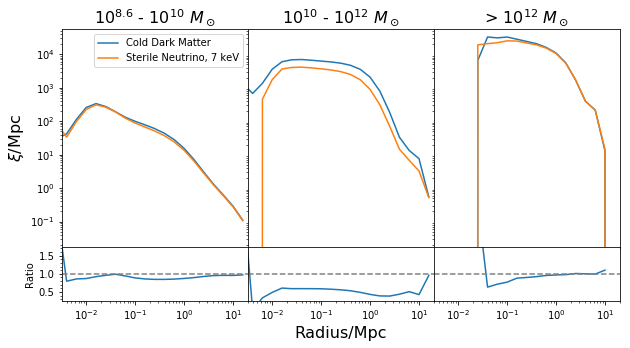

In [37]:
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.set_title(r"10$^{8.6}$ - 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.loglog(CUTE_cdm_mid[:,0], CUTE_cdm_mid[:,1])
grid1.loglog(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1])
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1])
grid2.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1])
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1])
grid3.set_ylabel("Ratio")

grid4.semilogx(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1]/CUTE_cdm_mid[:,1])
grid4.set_xlabel("Radius/Mpc", fontsize = 16)

grid5.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1])

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(10**-2.5, 2e1)
    plt.subplot(grid[i]).set_ylim(10**-1.75, 10**4.75)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.25, 1.75)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data2/Corrfunc_Mass_Odyssey.png")
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


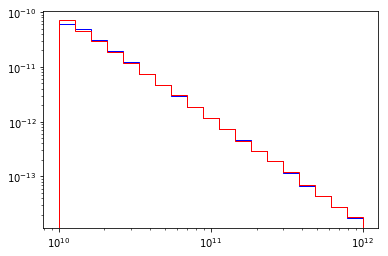

[9.99823049e+11 9.99550157e+11 9.99506117e+11 ... 1.00502415e+10
 1.00502415e+10 1.00502415e+10] [9.99990231e+11 9.99462142e+11 9.99418167e+11 ... 1.04638679e+10
 1.04638679e+10 1.04638679e+10]


In [38]:
plt.hist(cdm_mass2_sample, bins=np.logspace(10,12,20), normed = True, fill = False, color='b', histtype='step')
plt.hist(wdm_mass2_sample, bins=np.logspace(10,12,20), normed = True, fill = False,color='r', histtype='step')
plt.xscale("log")
plt.yscale('log')
plt.show()
print(wdm_mass2_sample, cdm_mass2_sample)